# Life Satisfaction and Political Views in the Ex-Soviet Bloc

## Part 1: Replication
## a) Life Satisfaction

In the first part of this project, we attempt to replicate the life satisfaction results by country and region that were stated in the Life in Transition III Report (hereafter LiT III Report). Here, life satisfaction in a country was defined as the percentage of respondents in that country who either "agree" or "strongly agree" with the statement "all things considered, I am satisfied with my life now" (EBRD, 2016, p. 12). Each response was survey-weighted; regional averages are "simple averages of the country scores" (ibid.).

In the report, the life satisfaction levels were presented in a bar chart and reported in individual country profiles. Below is the bar chart. 

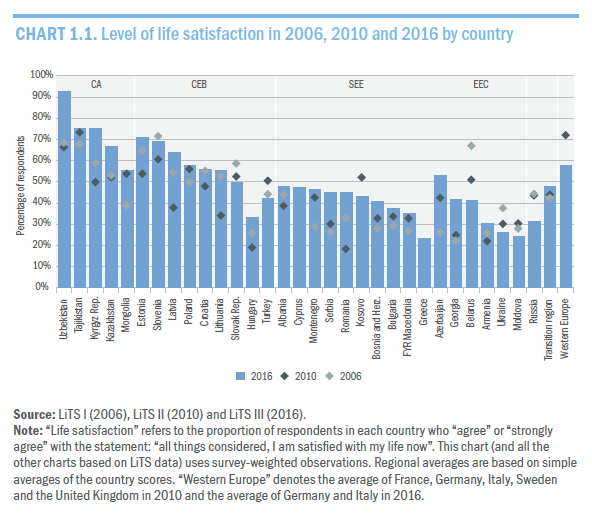

In [1]:
from IPython.display import Image
# life_satisfaction_orig_chart = Image("Life Satisfaction Chart.png")
life_satisfaction_orig_chart = Image("./data/Life Satisfaction Chart.png") # linux - repo folder
life_satisfaction_orig_chart

And below we build a dataframe with the life satisfaction levels as gleaned from the individual country profiles and/or the above chart, rounded to 2 sf. These are the life satisfaction data that we will try to replicate. Note. The life satisfaction result for the Czech Republic was not stated in the report. 

In [2]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Suppress warning about mixed data types in columns (change this later?)
import warnings
warnings.filterwarnings('ignore')

To build the dataframe, region definitions used in the report are given.

In [3]:
# Define regions used in the report.

# Firstly, is it a transition country or not?
# The "transition region" as defined in the LiTS III Report. This includes Cyprus, Greece, and Turkey, which are not seen as historically part of the Eastern Bloc. This definition of "transition region" is used for the purposes of replication.
transition = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herz.', 'Bulgaria', 'Croatia', 'Cyprus', 'Estonia', 'FYR Macedonia', 'Georgia', 'Greece', 'Hungary', 'Kazakhstan', 'Kosovo', 'Kyrgyz Rep.', 'Latvia', 'Lithuania', 'Moldova', 'Mongolia', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovak Rep.', 'Slovenia', 'Tajikistan', 'Turkey', 'Ukraine', 'Uzbekistan']

# And secondly, which region does it belong to?
# Countries of Central Asia (CA)
ca = ['Uzbekistan', 'Tajikistan', 'Kyrgyz Rep.', 'Kazakhstan', 'Mongolia']
# Countries in central Europe and the Baltic states (CEB)
ceb = ['Estonia', 'Slovenia', 'Latvia', 'Poland', 'Croatia', 'Lithuania', 'Slovak Rep.', 'Hungary']
# Countries in south-eastern Europe (SEE)
see = ['Albania', 'Cyprus', 'Montenegro', 'Serbia', 'Romania', 'Kosovo', 'Bosnia and Herz.', 'Bulgaria', 'FYR Macedonia', 'Greece']
# Countries in eastern Europe and the Caucasus (EEC)
eec = ['Azerbaijan', 'Georgia', 'Belarus', 'Armenia', 'Ukraine', 'Moldova']
# A couple of western European countries for comparison
we = ['Germany', 'Italy']
# Standalone countries
standalone = ['Czech Rep.', 'Russia', 'Turkey']

And recoding functions are defined using the above region definitions.

In [4]:
def transition_recoder(country):
    """ Return a boolean for whether a country is in the transition region or not.
    
    Parameters
    ----------
    country : string
        The country for which it is to be determined whether it is in the transition region or not.
    
    Returns
    -------
    in_transition : boolean
        Whether the country is in the transition region or not.
    """
    
    if country in transition:
        in_transition = True
    else:
        in_transition = False
    
    return in_transition

In [5]:
def region_recoder(country):
    """ Return a string that represents the region in which a country is located.
    
    Parameters
    ----------
    country : string
        The country whose region is to be determined.
    
    Returns
    -------
    region : string
        The region of the country.
    """
    
    
    if country in ca:
        region = 'C Asia'
    elif country in ceb:
        region = 'C Europe & Baltics'
    elif country in see:
        region = 'SE Europe'
    elif country in eec:
        region = 'E Europe & Caucasus'
    elif country in we:
        region = 'W Europe'
    elif country in standalone:
        region = country
    
    return region

In [6]:
all_countries = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herz.', 'Bulgaria', 'Croatia', 'Cyprus', 'Estonia', 'FYR Macedonia', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Italy', 'Kazakhstan', 'Kosovo', 'Kyrgyz Rep.', 'Latvia', 'Lithuania', 'Moldova', 'Mongolia', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovak Rep.', 'Slovenia', 'Tajikistan', 'Turkey', 'Ukraine', 'Uzbekistan']

In [7]:
original_satisfaction = pd.DataFrame()
original_satisfaction['Country'] = all_countries
original_satisfaction['Transition'] = original_satisfaction['Country'].apply(transition_recoder)
original_satisfaction['Region'] = original_satisfaction['Country'].apply(region_recoder)
original_satisfaction['Life Satisfaction (%)'] = [48, 30, 53, 41, 40, 37, 56, 48, 71, 35, 42, 73, 24, 33, 43, 67, 43, 75, 64, 56, 24, 55, 46, 58, 45, 32, 46, 50, 69, 75, 42, 26, 93]
original_satisfaction

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,48
1,Armenia,True,E Europe & Caucasus,30
2,Azerbaijan,True,E Europe & Caucasus,53
3,Belarus,True,E Europe & Caucasus,41
4,Bosnia and Herz.,True,SE Europe,40
5,Bulgaria,True,SE Europe,37
6,Croatia,True,C Europe & Baltics,56
7,Cyprus,True,SE Europe,48
8,Estonia,True,C Europe & Baltics,71
9,FYR Macedonia,True,SE Europe,35


Now we calculate the mean life satisfactions for the transition and western European regions.

In [8]:
# Calculate the mean life satisfaction in the transition region.
transition_original_satisfaction = np.mean(original_satisfaction[original_satisfaction['Transition'] == True]['Life Satisfaction (%)'])
print('Transition region life satisfaction: ' + str(round(transition_original_satisfaction)) + '%')

Transition region life satisfaction: 49%


In [9]:
# Calculate the mean life satisfaction in western Europe.
w_europe_original_satisfaction = np.mean(original_satisfaction[original_satisfaction['Region'] == 'W Europe']['Life Satisfaction (%)'])
print('Western Europe life satisfaction: ' + str(round(w_europe_original_satisfaction)) + '%')

Western Europe life satisfaction: 58%


## Replication of the Life satisfaction data

For replication, we load the original data from a .csv file. 'Weight 1' refers to the weight of a respondent's answers as a proportion of 1, where 1 represents the total weight of a country's respondents. Note. The total country weight does not always sum to 1 due to a precision cut-off in the .csv file.

In [10]:
# Extract the the zipped csv data
#import zipfile
#with zipfile.ZipFile("./data/LiTS_III_2016.zip","r") as zip_ref:
#    zip_ref.extractall("./data/")

In [11]:
# Read the table
lits_2016 = pd.read_csv('./data/LiTS_III_2016.csv') # data in the repo folder linux
# lits_2016 = pd.read_csv('LiTS III.csv')
# Select only the columns we're interested in (can increase this as we go along)
good_cols = ['country', 'PSU_number', 'urban', 'latitude', 'age_pr', 'weight_sample', 'weight_one', 'q401e', 'q412', 'q401c', 'q421', 'q424', 'PRq502', 'q223', 'PRq315', 'PRq316', 'PRq317', 'q923', 'q901', 'q109_1', 'q922', 'q403', 'q405b']
lits_2016 = lits_2016.loc[:, good_cols]
# Give the columns new names
good_names = ['Country', 'PSU', 'Urban', 'Latitude', 'Age', 'Weight Sample', 'Weight 1', 'Life Satisfaction', 'Political System', 'Parents', 'Inequality', 'Socialising', 'Employment', 'Monthly Income', 'Wealth Level', 'Past Wealth Level', 'Predicted Wealth Level', 'Ethnicity', 'Health', 'Education', 'Religious', 'Trust General', 'Trust Neighbourhood']
lits_2016.columns = good_names
lits_2016.head()

,Country,PSU,Urban,Latitude,Age,Weight Sample,Weight 1,Life Satisfaction,Political System,Parents,...,Monthly Income,Wealth Level,Past Wealth Level,Predicted Wealth Level,Ethnicity,Health,Education,Religious,Trust General,Trust Neighbourhood
0,Albania,1,2,42.102861,47,0.65471,0.000436,2.0,1.0,2.0,...,-99,6.0,6.0,6.0,1.0,4.0,2,7.0,1.0,1.0
1,Albania,1,2,42.102861,58,0.50372,0.000336,2.0,1.0,2.0,...,50000,5.0,6.0,6.0,1.0,3.0,2,7.0,1.0,2.0
2,Albania,1,2,42.102861,40,1.03809,0.000692,2.0,2.0,2.0,...,-99,5.0,6.0,7.0,1.0,3.0,7,7.0,1.0,2.0
3,Albania,1,2,42.102861,58,0.50372,0.000336,2.0,2.0,2.0,...,30000,5.0,5.0,6.0,1.0,3.0,2,5.0,1.0,2.0
4,Albania,1,2,42.102861,28,0.67950,0.000453,4.0,3.0,4.0,...,-97,5.0,5.0,7.0,1.0,5.0,7,4.0,1.0,2.0


In [12]:
# Define functions that will help calculate the survey-weighted level of a measure for a country or a group of countries.
def exclude_values(df, measure, exclusions):
    """ Remove the rows containing values in exclusions in a certain column from a dataframe.
    
    Parameters
    ----------
    df : dataframe
        The dataframe to be cleaned.
    measure: string
        The name of the column in the dataframe based on which the dataframe will be cleaned.
    exclusions : array
        Values of the column_name that will be removed along with their corresponding rows.
        
    Returns
    -------
    df_overall : dataframe
        The cleaned dataframe
    
    """
    
    df_overall = df.copy()
    
    for i in np.arange(len(exclusions)):
        indices = df_overall[df_overall[measure] == exclusions[i]].index
        df_overall = df_overall.drop(indices)
    
    return df_overall

def include_values(df, measure, criteria):
    """ Build a dataframe using rows from an existing dataframe that contain values in criteria in a certain column.
    
    Parameters
    ----------
    df : dataframe
        The dataframe from which the rows will be drawn.
    measure: string
        The name of the column in the dataframe based on which the new dataframe will be built.
    criteria : array
        Values of the column_name that will be included along with their corresponding rows in the new dataframe.
        
    Returns
    -------
    df_select : dataframe
        The built dataframe
    
    """
    
    df_select = pd.DataFrame()
    
    for i in np.arange(len(criteria)):
        df_select = df_select.append(df.copy()[df[measure] == criteria[i]])
        
    return df_select

def calc_mean_percentage(countries, df, measure, exclusions, criteria):
    """ Return the mean percentage of respondents in given countries who fulfilled certain criteria on a given measure.
    
    Paramaters
    ----------
    countries : array
        Countries for which we are finding the percentage of respondents who fulfilled certain criteria.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    criteria: array
        Values of the measure of interest that are included for calculating the mean percentage.
    
    Returns
    -------
    mean_percentage : number
        The mean percentage of respondents in given countries who fulfilled certain criteria on a given measure.
    
    """
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df, measure, exclusions)
    
    # Create a new dataframe that contains only those rows that passed the criteria on the measure column.
    df_select = include_values(df_overall, measure, criteria)
    
    # If a string was passed to countries, convert it into an array.
    if type(countries) == np.str:
        countries = [countries]
    
    # Calculate the mean percentage(s).
    percentages = np.zeros(len(countries))

    for k in np.arange(len(countries)):
        percentages[k] = np.sum(df_select[df_select['Country'] == countries[k]]['Weight 1']) / np.sum(df_overall[df_overall['Country'] == countries[k]]['Weight 1']) * 100
    
    mean_percentage = np.sum(percentages) / len(percentages)
    
    return mean_percentage

We do the life satisfaction replication. To do this, we firstly define the exclusions and criteria.

In [13]:
# Define exclusions and criteria.

# We want to exclude those rows for which life satisfaction is NaN, -97 ('don't know'), or -98 ('not applicable')
satisfaction_exclusions = [np.nan, -97, -98]

# We want to use those rows for which the answer to the life satisfaction statement was either 'agree' (4) or 'strongly agree' (5)
satisfaction_criteria = [4, 5]

In [14]:
replicated_satisfaction = pd.DataFrame()
replicated_satisfaction[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
replicated_satisfaction['Life Satisfaction (%)'] = replicated_satisfaction['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
replicated_satisfaction

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,48.036440
1,Armenia,True,E Europe & Caucasus,30.401669
2,Azerbaijan,True,E Europe & Caucasus,53.220290
3,Belarus,True,E Europe & Caucasus,41.299879
4,Bosnia and Herz.,True,SE Europe,40.369339
5,Bulgaria,True,SE Europe,36.774362
6,Croatia,True,C Europe & Baltics,56.091001
7,Cyprus,True,SE Europe,47.583945
8,Estonia,True,C Europe & Baltics,70.911584
9,FYR Macedonia,True,SE Europe,35.073736


In [15]:
# See the differences between the original and replication dataframes.
differences_satisfaction = pd.DataFrame()
differences_satisfaction['Country'] = all_countries
differences_satisfaction['Life Satisfaction Differences (%)'] = (replicated_satisfaction['Life Satisfaction (%)'] - original_satisfaction['Life Satisfaction (%)']).round()
differences_satisfaction

,Country,Life Satisfaction Differences (%)
0,Albania,0.0
1,Armenia,0.0
2,Azerbaijan,0.0
3,Belarus,0.0
4,Bosnia and Herz.,0.0
5,Bulgaria,-0.0
6,Croatia,0.0
7,Cyprus,-0.0
8,Estonia,-0.0
9,FYR Macedonia,0.0


All countries' results, save for Germany's and Italy's, were replicated. For Germany and Italy, the results were 1 percentage point off in each case, which may be due to typos in the report.

In [16]:
# Calculate the mean life satisfaction in the transition region.
transition_replicated_satisfaction = np.mean(replicated_satisfaction[replicated_satisfaction['Transition'] == True]['Life Satisfaction (%)'])
print('Transition region life satisfaction: ' + str(round(transition_replicated_satisfaction)) + '%')

Transition region life satisfaction: 49%


In [17]:
# Calculate the mean life satisfaction in western Europe.
w_europe_replicated_satisfaction = np.mean(replicated_satisfaction[replicated_satisfaction['Region'] == 'W Europe']['Life Satisfaction (%)'])
print('Western Europe life satisfaction: ' + str(round(w_europe_replicated_satisfaction)) + '%')

Western Europe life satisfaction: 57%


The mean life satisfaction for the transition region as a whole was replicated. Due to the differences between the original and replicated results for Germany and Italy, the result for western Europe in the replication was also slightly lower than originally stated.

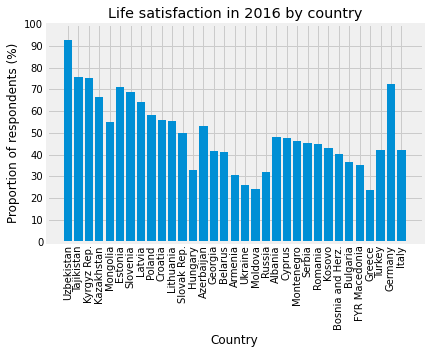

In [18]:
# Plot the replication results
satisfaction_for_plot = replicated_satisfaction.sort_values(by=['Region', 'Life Satisfaction (%)'], ascending=[True,False])
plt.bar(satisfaction_for_plot['Country'], satisfaction_for_plot['Life Satisfaction (%)']);
plt.title('Life satisfaction in 2016 by country')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Proportion of respondents (%)')
plt.xticks(rotation = 90);
plt.yticks(np.arange(0, 101, step = 10));

**Note. Ideally, we would keep the same order of the regions in this bar chart as the original bar chart. Need to figure out how to do this.**

Figure 1. Mean life satisfaction levels across countries in 2016.

## b) Political System

Next, we try to replicate the results for political system preferences. Specifically, we find the percentage of each country's population who said that 'under some circumstances, an authoritarian government may be preferable to a democratic one'. As before, we first collate the original results in a dataframe.

In [19]:
original_politics = pd.DataFrame()
original_politics[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
original_politics['Authoritarianism (%)'] = [31, 7, 11, 29, 27, 21, 25, 5, 20, 13, 12, np.nan, 12, 16, np.nan, 24, 18, 24, 31, 14, 26, 29, 17, 20, 22, 36, 23, 27, 19, 12, 19, 36, 7]
original_politics

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,31.0
1,Armenia,True,E Europe & Caucasus,7.0
2,Azerbaijan,True,E Europe & Caucasus,11.0
3,Belarus,True,E Europe & Caucasus,29.0
4,Bosnia and Herz.,True,SE Europe,27.0
5,Bulgaria,True,SE Europe,21.0
6,Croatia,True,C Europe & Baltics,25.0
7,Cyprus,True,SE Europe,5.0
8,Estonia,True,C Europe & Baltics,20.0
9,FYR Macedonia,True,SE Europe,13.0


Now we calculate the mean level of preference for authoritarianism for the transition region.

In [20]:
# Calculate the mean level of preference for authoritarianism in the transition region.
transition_original_politics = np.mean(original_politics[original_politics['Transition'] == True]['Authoritarianism (%)'])
print('Transition region preference for authoritarianism: ' + str(round(transition_original_politics)) + '%')

Transition region preference for authoritarianism: 20%


There are no data in the report about support for authoritarianism in Germany and Italy individually, although the average across the two countries is around 13%, as taken from Chart 3 on p.75 of the LiT III Report (EBRD, 2016).

We do the political system preferences replication, firstly defining the exclusions and criteria.

In [21]:
# Define exclusions and criteria.

# We want to exclude those rows for which political system preference is NaN or -97 ('don't know').
politics_exclusions = [np.nan, -97]

# We want to use those rows for which the answer to the political system preferences question was 'under some circumstances, an authoritarian government may be preferable to a democratic one' (2).
politics_criteria = [2]

In [22]:
replicated_politics = pd.DataFrame()
replicated_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
replicated_politics['Authoritarianism (%)'] = replicated_politics['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Political System', politics_exclusions, politics_criteria))
replicated_politics

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,31.111022
1,Armenia,True,E Europe & Caucasus,6.794569
2,Azerbaijan,True,E Europe & Caucasus,11.002291
3,Belarus,True,E Europe & Caucasus,28.773060
4,Bosnia and Herz.,True,SE Europe,26.532885
5,Bulgaria,True,SE Europe,21.457077
6,Croatia,True,C Europe & Baltics,24.908399
7,Cyprus,True,SE Europe,5.144849
8,Estonia,True,C Europe & Baltics,20.350766
9,FYR Macedonia,True,SE Europe,12.809493


In [23]:
differences_politics = pd.DataFrame()
differences_politics['Country'] = original_politics['Country']
differences_politics['Authoritarianism Differences (%)'] = (replicated_politics['Authoritarianism (%)'] - original_politics['Authoritarianism (%)']).round()
differences_politics

,Country,Authoritarianism Differences (%)
0,Albania,0.0
1,Armenia,-0.0
2,Azerbaijan,0.0
3,Belarus,-0.0
4,Bosnia and Herz.,-0.0
5,Bulgaria,0.0
6,Croatia,-0.0
7,Cyprus,0.0
8,Estonia,0.0
9,FYR Macedonia,-0.0


In [24]:
# Calculate the mean life satisfaction in the transition region.
transition_replicated_politics = np.mean(replicated_politics[replicated_politics['Transition'] == True]['Authoritarianism (%)'])
print('Transition region preference for authoritarianism: ' + str(round(transition_replicated_politics)) + '%')

Transition region preference for authoritarianism: 20%


In [25]:
# Calculate the mean life satisfaction in western Europe.
w_europe_replicated_politics = np.mean(replicated_politics[replicated_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
print('Western Europe preference for authoritarianism: ' + str(round(w_europe_replicated_politics)) + '%')

Western Europe preference for authoritarianism: 13%


All countries' and regions' results were replicated for the question of whether authoritarian government is sometimes preferable.

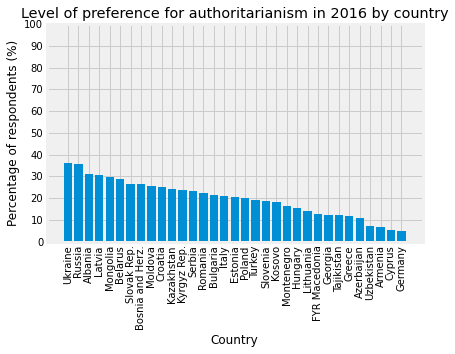

In [26]:
# Plot the replication results
politics_for_plot = replicated_politics.sort_values(by='Authoritarianism (%)', ascending=False)
plt.bar(politics_for_plot['Country'], politics_for_plot['Authoritarianism (%)']);
plt.title('Level of preference for authoritarianism in 2016 by country')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Percentage of respondents (%)')
plt.xticks(rotation = 90);
plt.yticks(np.arange(0, 101, step = 10));

Figure 2. Mean level of preference for authoritarianism across countries in 2016.

Note. The Guardian article on the LiTS III (https://www.theguardian.com/world/2016/dec/14/unhappy-russians-nostalgic-for-soviet-style-rule-study) was inaccurate. The article stated that 'just over half the respondents from former Soviet states...thought a return to a more authoritarian system would be a plus in some circumstances'. In figure 2, however, we can see that no country had more than 50% of its respondents answer this way. We suspect that The Guardian claimed this based on an inversion of the EBRD chief economist's statement that 'in most of our countries the majority doesn't seem to prefer democracy over authoritarian rule'. However, the newspaper must not have taken into account that there were two other response options, namely, 'don't know' and 'it does not matter whether a government is democratic or authoritarian'. We briefly test this idea below.

In [27]:
# Define former Soviet states.

# Countries that were formerly part of the Soviet Union.
ussr = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyz Rep.', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

In [28]:
def ussr_recoder(country):
    """ Return a boolean for whether a country was in the Soviet Union or not.
    
    Parameters
    ----------
    country : string
        The country for which it is to be determined whether it was in the Soviet Union or not.
    
    Returns
    -------
    in_ussr : boolean
        Whether the country was in the Soviet Union or not.
    """
    
    if country in ussr:
        in_ussr = True
    else:
        in_ussr = False
    
    return in_ussr

In [29]:
# Define exclusions and criteria.

# We want to exclude those rows for which political system preference is NaN.
guardian_exclusions = [np.nan]

# We want to use those rows for which the answer to the political system preferences question was either 'it does not matter whether a government is democratic or authoritarian' (3) or 'don't know' (-97).
guardian_criteria_doesntmatter = [3]

guardian_criteria_dontknow = [-97]

In [30]:
replicated_politics_guardian = pd.DataFrame()
replicated_politics_guardian[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
replicated_politics_guardian['USSR'] = replicated_politics_guardian['Country'].apply(ussr_recoder)
replicated_politics_guardian['Authoritarianism (%)'] = replicated_politics['Authoritarianism (%)']
replicated_politics_guardian["Doesn't matter (%)"] = replicated_politics_guardian['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Political System', guardian_exclusions, guardian_criteria_doesntmatter)).round(1)
replicated_politics_guardian["Don't know (%)"] = replicated_politics_guardian['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Political System', guardian_exclusions, guardian_criteria_dontknow)).round(1)
replicated_politics_guardian.head()

,Country,Transition,Region,USSR,Authoritarianism (%),Doesn't matter (%),Don't know (%)
0,Albania,True,SE Europe,False,31.111022,16.6,7.0
1,Armenia,True,E Europe & Caucasus,True,6.794569,26.5,1.9
2,Azerbaijan,True,E Europe & Caucasus,True,11.002291,35.5,41.9
3,Belarus,True,E Europe & Caucasus,True,28.773060,30.6,13.1
4,Bosnia and Herz.,True,SE Europe,False,26.532885,24.1,11.7


Test the different combinations: (1) authoritarianism by itself, (2) authoritarianism + doesn't matter, (3) authoritarianism + don't know, and (4) authoritiarianism + doesn't matter + don't know

In [31]:
# Calculate the mean level of preference for authoritarianism or political uncertainty or indifference in former Soviet states.
ussr_replicated_politics_1 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True]['Authoritarianism (%)'])
ussr_replicated_politics_2 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True][['Authoritarianism (%)', "Doesn't matter (%)"]].sum(axis=1))
ussr_replicated_politics_3 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True][['Authoritarianism (%)', "Don't know (%)"]].sum(axis=1))
ussr_replicated_politics_4 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True][['Authoritarianism (%)', "Doesn't matter (%)", "Don't know (%)"]].sum(axis=1))

print('Preference for authoritarianism across former Soviet states: ' + str(round(ussr_replicated_politics_1)) + '%')
print('Preference for authoritarianism or indifference across former Soviet states: ' + str(round(ussr_replicated_politics_2)) + '%')
print('Preference for authoritarianism or uncertainty across former Soviet states: ' + str(round(ussr_replicated_politics_3)) + '%')
print('Preference for authoritarianism or indifference or uncertainty across former Soviet states: ' + str(round(ussr_replicated_politics_4)) + '%')

Preference for authoritarianism across former Soviet states: 21%
Preference for authoritarianism or indifference across former Soviet states: 45%
Preference for authoritarianism or uncertainty across former Soviet states: 32%
Preference for authoritarianism or indifference or uncertainty across former Soviet states: 56%


As can be seen above, only when one considers the combination of preference for authoritarianism, political uncertainty, and political indifference, are over half of respondents from former Soviet states accounted for.

## Part 2: Analysis

Now that we've done the replications, we ask, how surprising are the mean levels of life satisfaction and preference for authoritarianism between the transition region and western Europe regions? Could these values have come about by chance? We test this below, firstly for life satisfaction.

In [32]:
# Recall the original life satisfaction values for the transition region and western Europe
print('Transition region life satisfaction: ' + str(transition_replicated_satisfaction) + '%')
print('Western Europe life satisfaction: ' + str(w_europe_replicated_satisfaction) + '%')
real_satisfaction_regions_diff = w_europe_replicated_satisfaction - transition_replicated_satisfaction
print('Difference: ' + str(real_satisfaction_regions_diff) + '%')

Transition region life satisfaction: 49.13116328969564%
Western Europe life satisfaction: 57.17010016841286%
Difference: 8.038936878717216%


In [33]:
# Get a set of fake results
satisfaction_regions_for_permutation = lits_2016.copy()
satisfaction_regions_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_regions_for_permutation['Life Satisfaction'])
fake_satisfaction_regions = pd.DataFrame()
fake_satisfaction_regions[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
fake_satisfaction_regions['Life Satisfaction (%)'] = fake_satisfaction_regions['Country'].apply(calc_mean_percentage, args=(satisfaction_regions_for_permutation, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
fake_satisfaction_regions.head()

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,47.640908
1,Armenia,True,E Europe & Caucasus,49.950362
2,Azerbaijan,True,E Europe & Caucasus,46.317403
3,Belarus,True,E Europe & Caucasus,49.010380
4,Bosnia and Herz.,True,SE Europe,49.862269


In [34]:
fake_satisfaction_regions_diff = np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Region'] == 'W Europe']['Life Satisfaction (%)']) - np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Transition'] == True]['Life Satisfaction (%)'])
fake_satisfaction_regions_diff

1.4210775553096582

In [35]:
# Run a permutation test
n_trials = 50
fake_satisfaction_regions_diffs = np.zeros(n_trials)
fake_satisfaction_regions = pd.DataFrame()
fake_satisfaction_regions[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
for i in np.arange(n_trials):
    satisfaction_regions_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_regions_for_permutation['Life Satisfaction'])
    fake_satisfaction_regions['Life Satisfaction (%)'] = fake_satisfaction_regions['Country'].apply(calc_mean_percentage, args=(satisfaction_regions_for_permutation, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
    fake_satisfaction_regions_diffs[i] = np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Region'] == 'W Europe']['Life Satisfaction (%)']) - np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Transition'] == True]['Life Satisfaction (%)'])
fake_satisfaction_regions_diffs[:5]

array([0.41937034, 0.48121544, 1.92961979, 0.3258702 , 0.09785872])

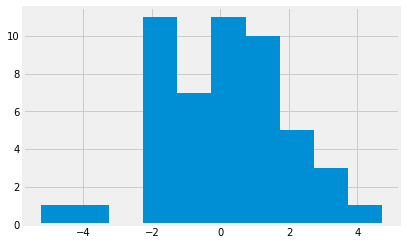

In [36]:
# Plot a histogram
plt.hist(fake_satisfaction_regions_diffs);

In [37]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_satisfaction_regions = np.count_nonzero(fake_satisfaction_regions_diffs >= real_satisfaction_regions_diff) / len(fake_satisfaction_regions_diffs)
p_gte_satisfaction_regions

0.0

In [38]:
# Life satisfaction (%) in Uzbekistan
uzbekistan_satisfaction = replicated_satisfaction[replicated_satisfaction['Country'] == 'Uzbekistan']['Life Satisfaction (%)'].values
uzbekistan_satisfaction

array([92.691976])

In [39]:
# Run a permutation test
n_trials = 50
fake_uzbekistan_satisfactions = np.zeros(n_trials)
fake_satisfaction_regions = pd.DataFrame()
fake_satisfaction_regions[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
for i in np.arange(n_trials):
    satisfaction_regions_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_regions_for_permutation['Life Satisfaction'])
    fake_satisfaction_regions['Life Satisfaction (%)'] = fake_satisfaction_regions['Country'].apply(calc_mean_percentage, args=(satisfaction_regions_for_permutation, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
    fake_uzbekistan_satisfactions[i] = fake_satisfaction_regions[fake_satisfaction_regions['Country'] == 'Uzbekistan']['Life Satisfaction (%)']
fake_uzbekistan_satisfactions[:5]

array([46.65528833, 50.01582629, 50.24282115, 49.39958926, 50.61490431])

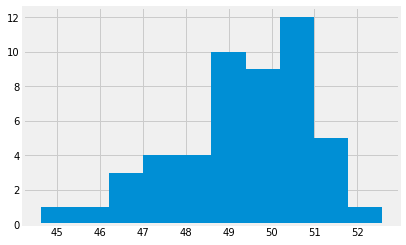

In [40]:
# Plot a histogram
plt.hist(fake_uzbekistan_satisfactions);

In [41]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_uzbekistan_satisfaction = np.count_nonzero(fake_uzbekistan_satisfactions >= uzbekistan_satisfaction) / len(fake_uzbekistan_satisfactions)
p_gte_uzbekistan_satisfaction

0.0

And now for the preference for authoritarianism results.

In [42]:
# Recall the original authoritarianism values for the transition region and western Europe
print('Transition region authoritarianism: ' + str(transition_replicated_politics) + '%')
print('Western Europe authoritarianism: ' + str(w_europe_replicated_politics) + '%')
real_politics_diff = transition_replicated_politics - w_europe_replicated_politics
print('Difference: ' + str(real_politics_diff) + '%')

Transition region authoritarianism: 20.382592989801264%
Western Europe authoritarianism: 13.057158753624226%
Difference: 7.325434236177038%


In [43]:
# Get a set of fake results
politics_for_permutation = lits_2016.copy()
politics_for_permutation['Political System'] = np.random.permutation(politics_for_permutation['Political System'])
fake_politics = pd.DataFrame()
fake_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
fake_politics['Authoritarianism (%)'] = fake_politics['Country'].apply(calc_mean_percentage, args=(politics_for_permutation, 'Political System', politics_exclusions, politics_criteria))
fake_politics.head()

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,20.563741
1,Armenia,True,E Europe & Caucasus,17.845828
2,Azerbaijan,True,E Europe & Caucasus,19.160004
3,Belarus,True,E Europe & Caucasus,20.446687
4,Bosnia and Herz.,True,SE Europe,20.533645


In [44]:
fake_politics_diff = np.mean(fake_politics[fake_politics['Transition'] == True]['Authoritarianism (%)']) - np.mean(fake_politics[fake_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
fake_politics_diff

-0.9371226010336535

In [45]:
# Run a permutation test
n_trials = 50
fake_politics_diffs = np.zeros(n_trials)
fake_politics = pd.DataFrame()
fake_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
for i in np.arange(n_trials):
    politics_for_permutation['Political System'] = np.random.permutation(politics_for_permutation['Political System'])
    fake_politics['Authoritarianism (%)'] = fake_politics['Country'].apply(calc_mean_percentage, args=(politics_for_permutation, 'Political System', politics_exclusions, politics_criteria))
    fake_politics_diffs[i] = np.mean(fake_politics[fake_politics['Transition'] == True]['Authoritarianism (%)']) - np.mean(fake_politics[fake_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
fake_politics_diffs[:5]

array([ 1.65523433,  1.48050948, -0.76705054, -2.09954665,  2.06575798])

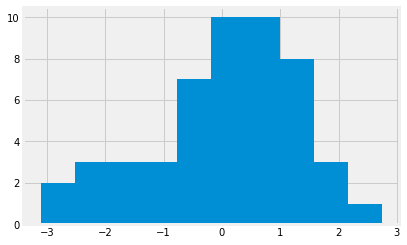

In [46]:
# Plot a histogram
plt.hist(fake_politics_diffs);

In [47]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_politics = np.count_nonzero(fake_politics_diffs >= real_politics_diff) / len(fake_politics_diffs)
p_gte_politics

0.0

For both life satisfaction (overall and for Uzbekistan) and preference for authoritarianism, it is highly unlikely that the results came about by chance since they did not occur at all in the null worlds.

We test whether there is a correlation between life satisfaction and preference for authoritarianism on the country level.

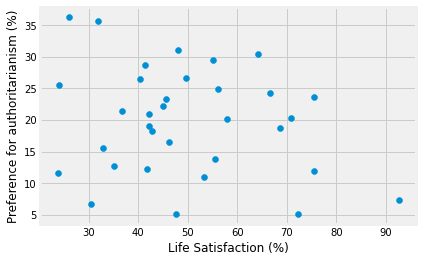

In [48]:
plt.scatter(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)']);
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');

Figure 3. Scatterplot of life satisfaction and preference for authoritarianism.

In [49]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [50]:
def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

In [51]:
correlation(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)'])

-0.22418977828188366

There is a weak negative correlation between life satisfaction and preference for authoritarianism. That is, broadly speaking, as life satisfaction increases, preference for authoritarianism tends to decrease.

In [52]:
from scipy.stats import linregress
result_ls_a = linregress(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)'])
result_ls_a

LinregressResult(slope=-0.11391920219883346, intercept=25.591112583929043, rvalue=-0.22418977828188366, pvalue=0.20975016394295673, stderr=0.0889410809974526)

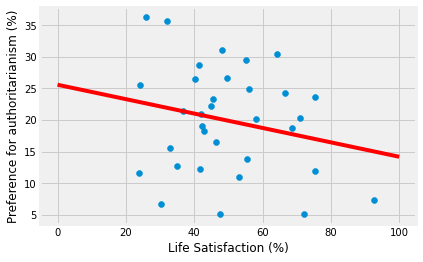

In [53]:
plt.scatter(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)']);
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');
x_ls_a = np.linspace(0,100,101)
y_ls_a = result_ls_a.slope * x_ls_a + result_ls_a.intercept
plt.plot(x_ls_a, y_ls_a, '-r');

However, country averages mask regional variations. Perhaps there might be a different correlation if we look at primary sampling units (PSUs), which are geographical areas within each country from which an average of 20 households were sampled.

In [54]:
# Define a function that will calculate the survey-weighted level of a certain measure for each PSU.
def calc_percentage_psu(country_psu, df, measure, exclusions, criteria):
    """ Return the mean percentage of respondents in a given PSU who fulfilled certain criteria on a given measure.
    
    Paramaters
    ----------
    country_psu : array
        The first element is the country of the PSU and the second element is the PSU for which we are finding the percentage of respondents who fulfilled certain criteria.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    criteria: array
        Values of the measure of interest that are included for calculating the percentage.
    
    Returns
    -------
    mean_percentage : number
        The mean percentage of respondents in a given PSU who fulfilled certain criteria on a given measure.
    
    """
    
    country, psu = country_psu
    
    # Take the segment of the dataframe corresponding to the given country and PSU.
    df_overall = df.copy()
    df_overall = df_overall[df_overall['Country'] == country]
    df_overall = df_overall[df_overall['PSU'] == psu]
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df_overall, measure, exclusions)
    
    # Create a new dataframe that contains only those rows that passed the criteria on the measure column.
    df_select = include_values(df_overall, measure, criteria)
        
    mean_percentage = np.sum(df_select['Weight 1']) / np.sum(df_overall['Weight 1']) * 100
    
    return mean_percentage

In [55]:
by_country_psu = lits_2016.groupby(['Country', 'PSU']).size().to_frame(name = 'Count').reset_index()
by_country_psu['Life Satisfaction (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
by_country_psu['Authoritarianism (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Political System', politics_exclusions, politics_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%)
0,Albania,1,20,22.923973,59.506502
1,Albania,2,20,33.530334,63.421760
2,Albania,3,20,83.029105,95.903399
3,Albania,4,20,81.967024,95.634206
4,Albania,5,20,97.047925,95.375235


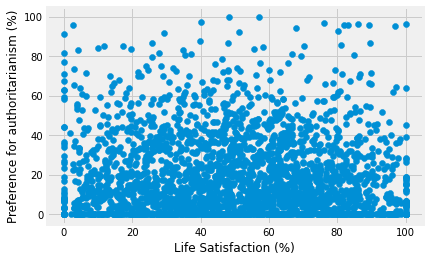

In [56]:
plt.scatter(by_country_psu['Life Satisfaction (%)'], by_country_psu['Authoritarianism (%)']);
#plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');

In [57]:
correlation(by_country_psu['Life Satisfaction (%)'], by_country_psu['Authoritarianism (%)'])

-0.04519003439155542

Once we examined the data at a finer scale of PSUs, there was practically no correlation between life satisfaction and preference for authoritarianism. That is, both happy and unhappy PSUs showed high and low preference for authoritarianism.

We proceed to examine other factors that might affect life satisfaction levels at both the country and PSU levels.

-0.3478155051287355

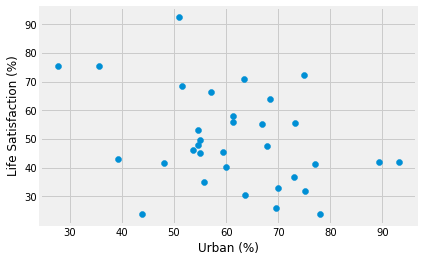

In [58]:
for_by_country = lits_2016.copy()
by_country = pd.DataFrame()
by_country['Country'] = all_countries
by_country['Life Satisfaction (%)'] = replicated_satisfaction['Life Satisfaction (%)']
urban_exclusions = []
urban_criteria = [1]
by_country['Urban (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Urban', urban_exclusions, urban_criteria))
plt.scatter(by_country['Urban (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Urban (%)')
plt.ylabel('Life Satisfaction (%)')
correlation(by_country['Urban (%)'], by_country['Life Satisfaction (%)'])

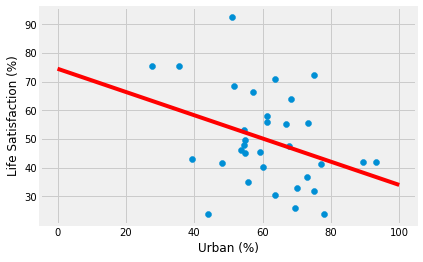

In [59]:
result_u_ls = linregress(by_country['Urban (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Urban (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Urban (%)')
plt.ylabel('Life Satisfaction (%)')
x_u_ls = np.linspace(0,100,101)
y_u_ls = result_u_ls.slope * x_u_ls + result_u_ls.intercept
plt.plot(x_u_ls, y_u_ls, '-r');

-0.05645662914224519

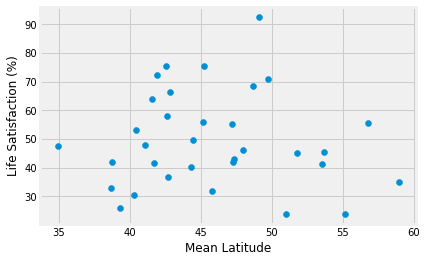

In [60]:
by_country['Mean Latitude'] = for_by_country.groupby('Country')['Latitude'].mean().reset_index()['Latitude']
plt.scatter(by_country['Mean Latitude'], by_country['Life Satisfaction (%)']);
plt.xlabel('Mean Latitude')
plt.ylabel('Life Satisfaction (%)')
correlation(by_country['Mean Latitude'], by_country['Life Satisfaction (%)'])

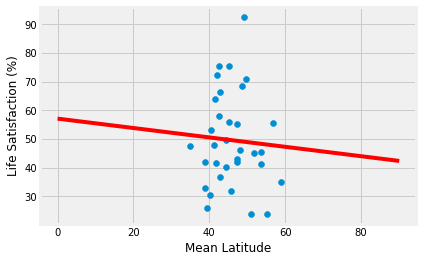

In [61]:
result_ml_ls = linregress(by_country['Mean Latitude'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Mean Latitude'], by_country['Life Satisfaction (%)']);
plt.xlabel('Mean Latitude')
plt.ylabel('Life Satisfaction (%)')
x_ml_ls = np.linspace(0,90,91)
y_ml_ls = result_ml_ls.slope * x_ml_ls + result_ml_ls.intercept
plt.plot(x_ml_ls, y_ml_ls, '-r');

-0.25253618754006973

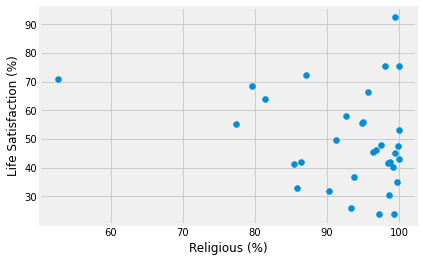

In [62]:
religious_exclusions = [-99, '']
religious_criteria = [2, 3, 4, 5, 6, 7, 8]
by_country['Religious (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Religious', religious_exclusions, religious_criteria))
plt.scatter(by_country['Religious (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Religious (%)')
plt.ylabel('Life Satisfaction (%)')
correlation(by_country['Religious (%)'], by_country['Life Satisfaction (%)'])

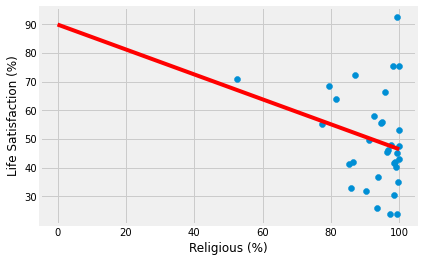

In [63]:
result_r_ls = linregress(by_country['Religious (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Religious (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Religious (%)')
plt.ylabel('Life Satisfaction (%)')
x_r_ls = np.linspace(0,100,101)
y_r_ls = result_r_ls.slope * x_r_ls + result_r_ls.intercept
plt.plot(x_r_ls, y_r_ls, '-r');

0.7490748500118649

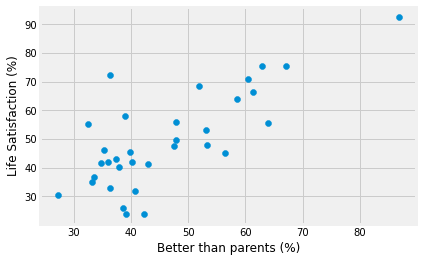

In [64]:
# Exclusions

parents_exclusions = [np.nan, -97, -98]

# Criteria

parents_criteria = [4, 5]
by_country['Better than parents (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Parents', parents_exclusions, parents_criteria))
plt.scatter(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Better than parents (%)')
plt.ylabel('Life Satisfaction (%)')
correlation(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)'])

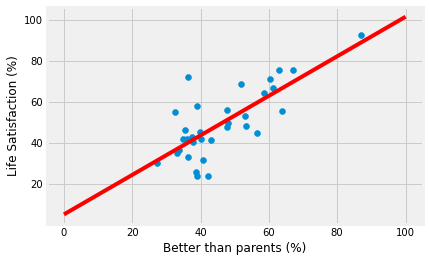

In [65]:
result_bp_ls = linregress(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Better than parents (%)')
plt.ylabel('Life Satisfaction (%)')
x_bp_ls = np.linspace(0,100,101)
y_bp_ls = result_bp_ls.slope * x_bp_ls + result_bp_ls.intercept
plt.plot(x_bp_ls, y_bp_ls, '-r');

0.45506163324638843

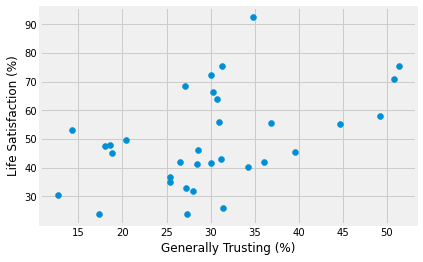

In [66]:
trust_general_exclusions = [-91, '']
trust_general_criteria = [4, 5]
by_country['Generally Trusting (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Trust General', trust_general_exclusions, trust_general_criteria))
plt.scatter(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Generally Trusting (%)')
plt.ylabel('Life Satisfaction (%)')
correlation(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)'])

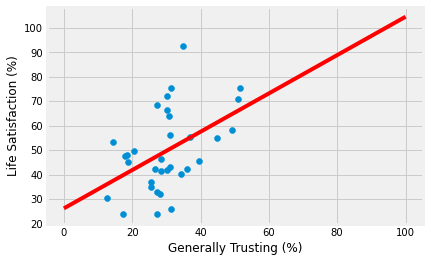

In [67]:
result_tg_ls = linregress(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Generally Trusting (%)')
plt.ylabel('Life Satisfaction (%)')
x_tg_ls = np.linspace(0,100,101)
y_tg_ls = result_tg_ls.slope * x_tg_ls + result_tg_ls.intercept
plt.plot(x_tg_ls, y_tg_ls, '-r');

0.5434193083693708

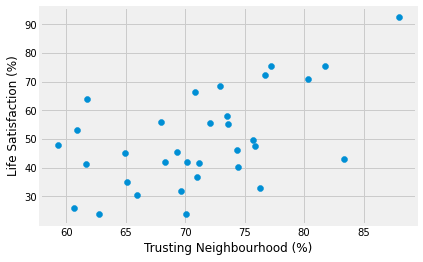

In [68]:
trust_neighbourhood_exclusions = [-97, -98, '']
trust_neighbourhood_criteria = [4, 5]
by_country['Trusting Neighbourhood (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Trust Neighbourhood', trust_neighbourhood_exclusions, trust_neighbourhood_criteria))
plt.scatter(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Trusting Neighbourhood (%)')
plt.ylabel('Life Satisfaction (%)')
correlation(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)'])

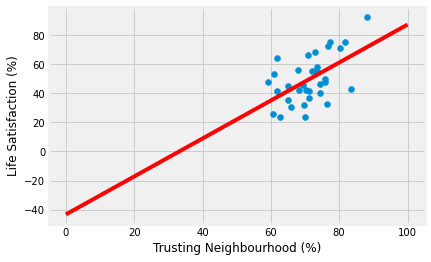

In [69]:
result_tn_ls = linregress(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Trusting Neighbourhood (%)')
plt.ylabel('Life Satisfaction (%)')
x_tn_ls = np.linspace(0,100,101)
y_tn_ls = result_tn_ls.slope * x_tn_ls + result_tn_ls.intercept
plt.plot(x_tn_ls, y_tn_ls, '-r');

In [70]:
# Define a function that will calculate the mean value of a certain measure in each PSU.
def calc_mean_psu(country_psu, df, measure, exclusions):
    """ Return the mean value of a given measure in a dataframe cleaned of values in exclusions.
    
    Paramaters
    ----------
    country_psu : array
        The first element is the country of the PSU and the second element is the PSU for which we are finding the mean of a certain measure.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    
    Returns
    -------
    mean : number
        The mean value of a given measure.
    
    """
    
    country, psu = country_psu
    
    # Take the segment of the dataframe corresponding to the given country and PSU.
    df_overall = df.copy()
    df_overall = df_overall[df_overall['Country'] == country]
    df_overall = df_overall[df_overall['PSU'] == psu]
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df_overall, measure, exclusions)

    mean = np.sum(df_overall['Weight Sample'] * df_overall[measure]) / np.sum(df_overall['Weight Sample'])
    
    return mean

In [71]:
# Exclusions

age_exclusions = []

In [72]:
by_country_psu['Mean age'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Age', age_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age
0,Albania,1,20,22.923973,59.506502,37.532303
1,Albania,2,20,33.530334,63.421760,43.484388
2,Albania,3,20,83.029105,95.903399,41.648407
3,Albania,4,20,81.967024,95.634206,48.774807
4,Albania,5,20,97.047925,95.375235,41.106053


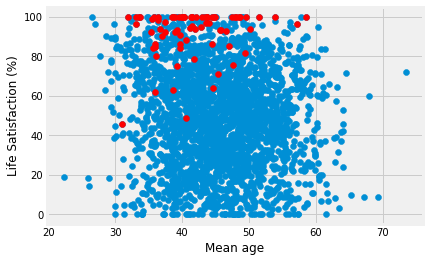

In [73]:
plt.scatter(by_country_psu['Mean age'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Mean age'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Mean age');
plt.ylabel('Life Satisfaction (%)');

In [74]:
correlation(by_country_psu['Mean age'], by_country_psu['Life Satisfaction (%)'])

-0.09672912155770742

There is no real correlation between mean age and mean life satisfaction in PSUs.

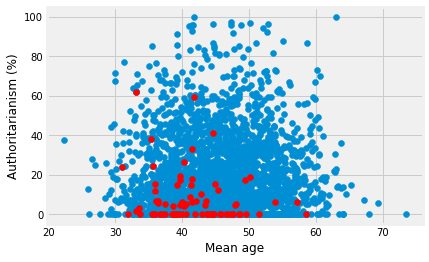

In [75]:
plt.scatter(by_country_psu['Mean age'], by_country_psu['Authoritarianism (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Mean age'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Mean age');
plt.ylabel('Authoritarianism (%)');

In [76]:
correlation(by_country_psu['Mean age'], by_country_psu['Authoritarianism (%)'])

0.00568888331257359

Similarly, there is no correlation between mean age and preference for authoritarianism when looking at individual PSUs.

What about the relationship between socialising with people outside the household (e.g., extended family and friends) and life satisfaction? We take high socialising to mean those who meet with friends and relatives at least once or twice a week.

In [77]:
# Exclusions

social_exclusions = [-97, -99]

# Criteria

social_criteria = [1, 2]

In [78]:
by_country_psu['Socialising (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Socialising', social_exclusions, social_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000


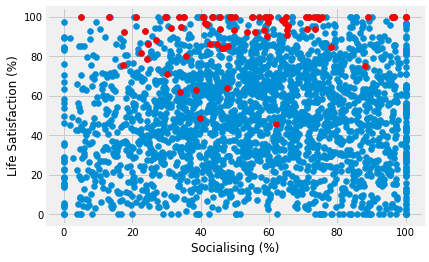

In [79]:
plt.scatter(by_country_psu['Socialising (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Socialising (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Socialising (%)');
plt.ylabel('Life Satisfaction (%)');

In [80]:
correlation(by_country_psu['Socialising (%)'], by_country_psu['Life Satisfaction (%)'])

0.04638498909585819

Again, mean levels of high socialising are a poor predictor of mean life satisfaction in PSUs.

We next turn to the question of income. First, we need to convert the monthly income from the local currency (LCU) to USD ($) to be able to compare. We can do this using the Purchasing Power Parity (PPP) from 2016.

In [81]:
# Exclusions

income_exclusions = [np.nan, -99, 2147483647] # there are 2 instances of this very high number that are extreme outliers, so will be excluded

In [82]:
by_country_psu['Monthly Income (LCU)'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Monthly Income', income_exclusions))
by_country_psu

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,4.264576e+04
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,4.410742e+04
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1.616997e+03
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,1.353026e+02
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,7.012675e+01
...,...,...,...,...,...,...,...,...
2541,Uzbekistan,71,20,75.808826,0.000000,47.567680,17.368721,2.095495e+06
2542,Uzbekistan,72,20,64.119574,41.365313,44.666007,47.602604,2.019473e+06
2543,Uzbekistan,73,20,71.217250,12.309709,45.412203,30.114617,1.341288e+06
2544,Uzbekistan,74,20,92.220943,0.000000,38.911502,56.019469,1.690936e+06


In 2016, Belarus introduced a new rouble such that 1 new rouble was equivalent to 10,000 old roubles. 
The incomes for Belarussian households in LiTS III were reported using the old currency, whereas the PPP loaded below assumes the new currency.
Therefore, to use with the PPP, we convert the Belarussian incomes from the old currency to the new currency.
Source: https://en.wikipedia.org/wiki/Belarusian_ruble#Third_ruble,_2016%E2%80%93present.

In [83]:
for i in np.arange(len(by_country_psu)):
    if by_country_psu.loc[i, 'Country'] == 'Belarus':
        by_country_psu.loc[i, 'Monthly Income (LCU)'] = by_country_psu.loc[i, 'Monthly Income (LCU)'] / 10000

We got the PPP data from https://databank.worldbank.org/reports.aspx?source=2&series=PA.NUS.PPP#

In [84]:
# Read the table
ppp = pd.read_csv('./data/PPP 2016.csv')
# Select only the columns we're interested in
good_cols = ['Country Name', '2016 [YR2016]']
ppp = ppp.loc[:, good_cols]
# Give the columns new names
good_names = ['Country', 'PPP']
ppp.columns = good_names
ppp.head()

,Country,PPP
0,Afghanistan,17.4458279431472
1,Albania,42.3858791506381
2,Algeria,37.1558265686035
3,American Samoa,..
4,Andorra,..


In [85]:
ppp_for_lits = pd.DataFrame()
for i in np.arange(len(ppp['Country'])):
    if ppp.iloc[i,0] in all_countries:
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
    elif ppp.iloc[i,0] == 'North Macedonia':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'FYR Macedonia'
    elif ppp.iloc[i,0] == 'Kyrgyz Republic':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Kyrgyz Rep.'
    elif ppp.iloc[i,0] == 'Russian Federation':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Russia'
    elif ppp.iloc[i,0] == 'Bosnia and Herzegovina':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Bosnia and Herz.'
    elif ppp.iloc[i,0] == 'Slovak Republic':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Slovak Rep.'
    elif ppp.iloc[i,0] == 'Czech Republic':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Czech Rep.'
ppp_for_lits = ppp_for_lits.sort_values('Country', ascending=True)
ppp_for_lits = ppp_for_lits.set_index('Country')
ppp_for_lits['PPP'] = pd.to_numeric(ppp_for_lits['PPP'])
ppp_for_lits.head()

,PPP
Country,
Albania,42.385879
Armenia,161.228882
Azerbaijan,0.430901
Belarus,0.563757
Bosnia and Herz.,0.675568


In [86]:
by_country_psu = by_country_psu.merge(ppp_for_lits, on='Country')
by_country_psu

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,4.264576e+04,42.385879
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,4.410742e+04,42.385879
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1.616997e+03,42.385879
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,1.353026e+02,42.385879
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,7.012675e+01,42.385879
...,...,...,...,...,...,...,...,...,...
2541,Uzbekistan,71,20,75.808826,0.000000,47.567680,17.368721,2.095495e+06,1179.956705
2542,Uzbekistan,72,20,64.119574,41.365313,44.666007,47.602604,2.019473e+06,1179.956705
2543,Uzbekistan,73,20,71.217250,12.309709,45.412203,30.114617,1.341288e+06,1179.956705
2544,Uzbekistan,74,20,92.220943,0.000000,38.911502,56.019469,1.690936e+06,1179.956705


We convert the monthly incomes from the local currency to USD ($).

In [87]:
by_country_psu['Monthly Income ($)'] = (by_country_psu['Monthly Income (LCU)'] / by_country_psu['PPP'])
by_country_psu

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,4.264576e+04,42.385879,1006.131267
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,4.410742e+04,42.385879,1040.615879
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1.616997e+03,42.385879,38.149432
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,1.353026e+02,42.385879,3.192161
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,7.012675e+01,42.385879,1.654484
...,...,...,...,...,...,...,...,...,...,...
2541,Uzbekistan,71,20,75.808826,0.000000,47.567680,17.368721,2.095495e+06,1179.956705,1775.908527
2542,Uzbekistan,72,20,64.119574,41.365313,44.666007,47.602604,2.019473e+06,1179.956705,1711.480270
2543,Uzbekistan,73,20,71.217250,12.309709,45.412203,30.114617,1.341288e+06,1179.956705,1136.726040
2544,Uzbekistan,74,20,92.220943,0.000000,38.911502,56.019469,1.690936e+06,1179.956705,1433.049410


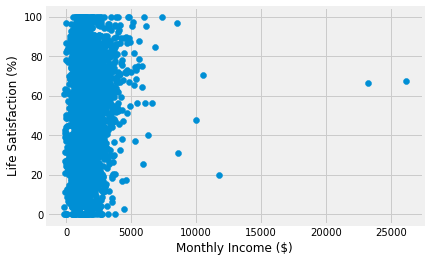

In [88]:
plt.scatter(by_country_psu['Monthly Income ($)'], by_country_psu['Life Satisfaction (%)']);
plt.xlabel('Monthly Income ($)');
plt.ylabel('Life Satisfaction (%)');

In [89]:
correlation(by_country_psu['Monthly Income ($)'], by_country_psu['Life Satisfaction (%)'])

0.17428135027584665

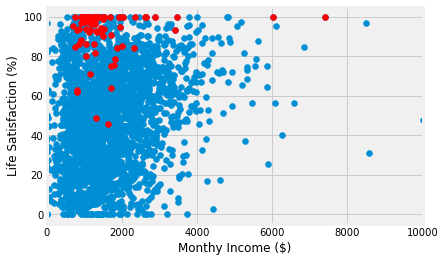

In [90]:
plt.scatter(by_country_psu['Monthly Income ($)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Monthly Income ($)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Monthy Income ($)');
plt.xlim([0, 10000]);
plt.ylabel('Life Satisfaction (%)');

In [91]:
correlation(by_country_psu[by_country_psu['Monthly Income ($)'] <= 10000]['Monthly Income ($)'], by_country_psu[by_country_psu['Monthly Income ($)'] <= 10000]['Life Satisfaction (%)'])

0.2061467639199239

There is a weak positive correlation between income levels and life satisfaction. Perhaps what matters is not absolute wealth, but (changes in) perceived wealth, which is what is explored next. Specifically, respondents were asked to imagine a 10-step ladder where the bottom rung represents their country's poorest 10%. They were then asked to judge where they would place themselves on that ladder now (2016), four years ago (2012), and four years into the future (2020). 

In [92]:
# Exclusions

wealth_exclusions = [np.nan, -97, -99]

In [93]:
by_country_psu['Wealth Level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Wealth Level', wealth_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120


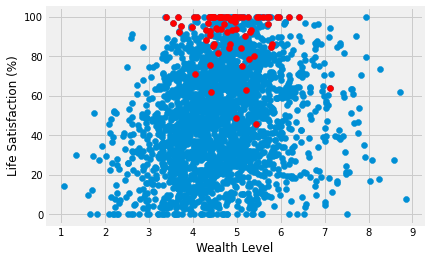

In [94]:
plt.scatter(by_country_psu['Wealth Level'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Wealth Level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Wealth Level');
plt.ylabel('Life Satisfaction (%)');

In [95]:
correlation(by_country_psu['Wealth Level'], by_country_psu['Life Satisfaction (%)'])

0.21363465220297492

In [96]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Wealth Level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

-0.14387615611482246

In [97]:
by_country_psu['Past Wealth Level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Past Wealth Level', wealth_exclusions))
by_country_psu['Past Wealth Change'] = by_country_psu['Wealth Level'] - by_country_psu['Past Wealth Level']
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894


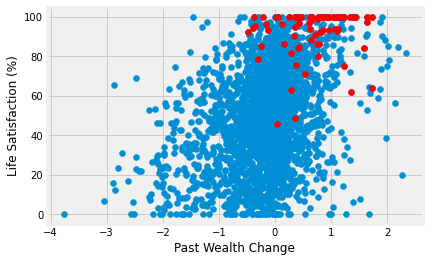

In [98]:
plt.scatter(by_country_psu['Past Wealth Change'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Past Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Past Wealth Change');
plt.ylabel('Life Satisfaction (%)');

In [99]:
correlation(by_country_psu['Past Wealth Change'], by_country_psu['Life Satisfaction (%)'])

0.3646231853760189

In [100]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Past Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.11236608308851866

In [101]:
by_country_psu['Predicted Wealth Level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Predicted Wealth Level', wealth_exclusions))
by_country_psu['Predicted Wealth Change'] = by_country_psu['Predicted Wealth Level'] - by_country_psu['Wealth Level']
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916


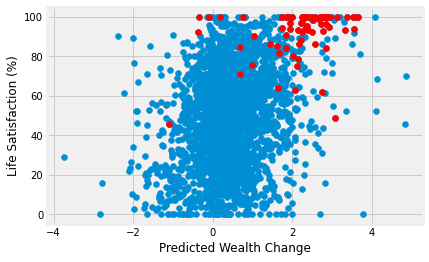

In [102]:
plt.scatter(by_country_psu['Predicted Wealth Change'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Predicted Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Predicted Wealth Change');
plt.ylabel('Life Satisfaction (%)');

In [103]:
correlation(by_country_psu['Predicted Wealth Change'], by_country_psu['Life Satisfaction (%)'])

0.30944847520081076

In [104]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Predicted Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.28699772732051904

There are stronger correlations between changes in perceived wealth up to now (perhaps a proxy for perceived progress) and life satisfaction, and between predicted changes in wealth (perhaps a proxy for future hope) and life satisfaction, than there is between present perceived wealth and life satisfaction.

Another measure for progress is how our lives compare to those of our parents, which may also factor in people's assessments of their life satisfaction.

In [105]:
# Exclusions

parents_exclusions = [np.nan, -97, -98]

# Criteria

parents_criteria = [4, 5]

In [106]:
by_country_psu['Better than parents (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Parents', parents_exclusions, parents_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447


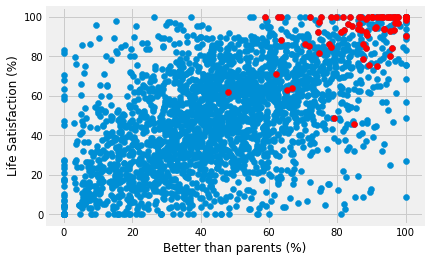

In [107]:
plt.scatter(by_country_psu['Better than parents (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Better than parents (%)');
plt.ylabel('Life Satisfaction (%)');

In [108]:
correlation(by_country_psu['Better than parents (%)'], by_country_psu['Life Satisfaction (%)'])

0.5574409741025526

In [109]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.4063037158698901

Thinking that one has done better in life than one's parents is the strongest predictor so far of current life satisfaction at the PSU level.

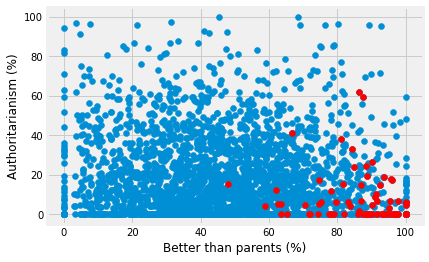

In [110]:
plt.scatter(by_country_psu['Better than parents (%)'], by_country_psu['Authoritarianism (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Better than parents (%)');
plt.ylabel('Authoritarianism (%)');

In [111]:
correlation(by_country_psu['Better than parents (%)'], by_country_psu['Authoritarianism (%)'])

-0.05387346635707617

In [112]:
# Exclusions

employment_exclusions = []

# Criteria

employment_criteria = [1]

In [113]:
by_country_psu['Employment (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Employment', employment_exclusions, employment_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141


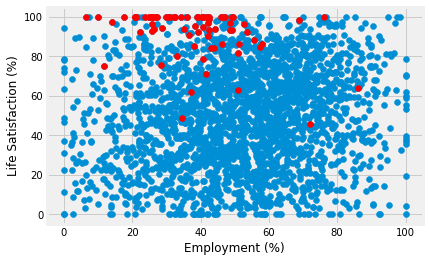

In [114]:
plt.scatter(by_country_psu['Employment (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Employment (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Employment (%)');
plt.ylabel('Life Satisfaction (%)');

In [115]:
correlation(by_country_psu['Employment (%)'], by_country_psu['Life Satisfaction (%)'])

0.09258160557125888

In [116]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Employment (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

-0.33328024243068255

In [117]:
# Exclusions

health_exclusions = [np.nan, -97]

# Criteria

health_criteria = [1, 2]

In [118]:
by_country_psu['Good health (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Health', health_exclusions, health_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000


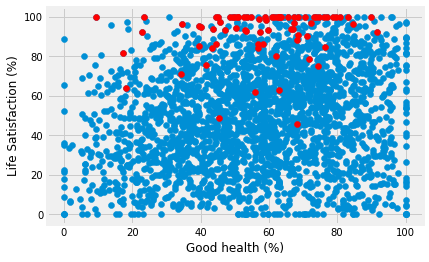

In [119]:
plt.scatter(by_country_psu['Good health (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Good health (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Good health (%)');
plt.ylabel('Life Satisfaction (%)');

In [120]:
correlation(by_country_psu['Good health (%)'], by_country_psu['Life Satisfaction (%)'])

0.17662513756395912

In [121]:
# Exclusions

education_exclusions = [np.nan]

In [122]:
by_country_psu['Education level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Education', education_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874


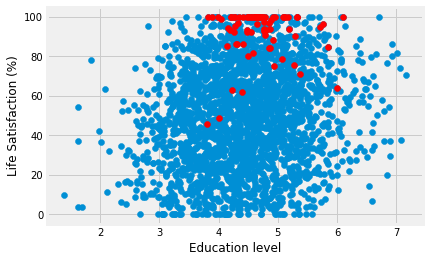

In [123]:
plt.scatter(by_country_psu['Education level'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Education level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Education level');
plt.ylabel('Life Satisfaction (%)');

In [124]:
correlation(by_country_psu['Education level'], by_country_psu['Life Satisfaction (%)'])

0.15858787818019007

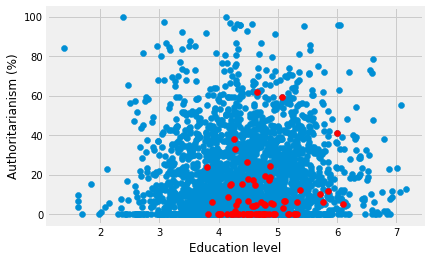

In [125]:
plt.scatter(by_country_psu['Education level'], by_country_psu['Authoritarianism (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Education level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Education level');
plt.ylabel('Authoritarianism (%)');

In [126]:
correlation(by_country_psu['Education level'], by_country_psu['Authoritarianism (%)'])

0.05558732304627637

In [127]:
# Exclusions

latitude_exclusions = []

In [128]:
by_country_psu['Latitude'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Latitude', latitude_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Latitude
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,42.102861
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,42.073028
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,42.070917
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,42.065556
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,42.081306


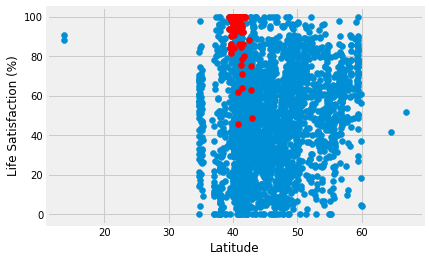

In [129]:
plt.scatter(by_country_psu['Latitude'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Latitude'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Latitude');
plt.ylabel('Life Satisfaction (%)');

In [130]:
correlation(by_country_psu['Latitude'], by_country_psu['Life Satisfaction (%)'])

0.10148326341033574

In [131]:
# Exclusions

religious_exclusions = [-99, '']

# Criteria

religious_criteria = [2, 3, 4, 5, 6, 7, 8]

In [132]:
by_country_psu['Religious (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Religious', religious_exclusions, religious_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),...,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Latitude,Religious (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,...,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,42.102861,100.0
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,...,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,42.073028,100.0
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,...,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,42.070917,100.0
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,...,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,42.065556,100.0
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,...,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,42.081306,100.0


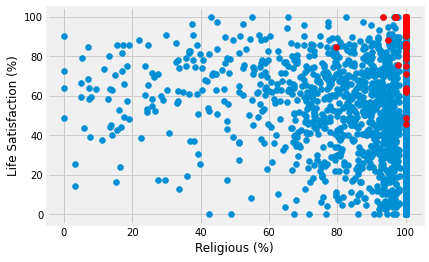

In [133]:
plt.scatter(by_country_psu['Religious (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Religious (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Religious (%)');
plt.ylabel('Life Satisfaction (%)');

In [134]:
correlation(by_country_psu['Religious (%)'], by_country_psu['Life Satisfaction (%)'])

-0.13545483038885944

In [135]:
# Exclusions

trust_general_exclusions = [-91, '']

# Criteria

trust_general_criteria = [4, 5]

In [136]:
by_country_psu['Generally Trusting (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Trust General', trust_general_exclusions, trust_general_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),...,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Latitude,Religious (%),Generally Trusting (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,...,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,42.102861,100.0,0.000000
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,...,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,42.073028,100.0,0.000000
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,...,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,42.070917,100.0,0.000000
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,...,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,42.065556,100.0,22.511566
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,...,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,42.081306,100.0,0.000000


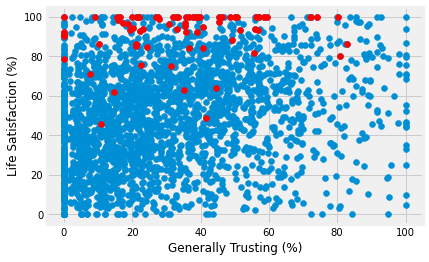

In [137]:
plt.scatter(by_country_psu['Generally Trusting (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Generally Trusting (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Generally Trusting (%)');
plt.ylabel('Life Satisfaction (%)');

In [138]:
correlation(by_country_psu['Generally Trusting (%)'], by_country_psu['Life Satisfaction (%)'])

0.2357521840668144

In [139]:
# Exclusions

trust_neighbourhood_exclusions = [-97, -98, '']

# Criteria

trust_neighbourhood_criteria = [4, 5]

In [140]:
by_country_psu['Trusting Neighbourhood (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Trust Neighbourhood', trust_neighbourhood_exclusions, trust_neighbourhood_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),...,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Latitude,Religious (%),Generally Trusting (%),Trusting Neighbourhood (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,...,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,42.102861,100.0,0.000000,48.599040
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,...,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,42.073028,100.0,0.000000,59.576569
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,...,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,42.070917,100.0,0.000000,79.559725
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,...,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,42.065556,100.0,22.511566,80.953657
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,...,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,42.081306,100.0,0.000000,71.901382


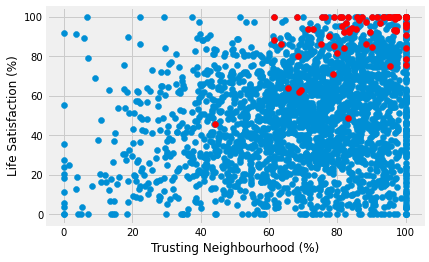

In [141]:
plt.scatter(by_country_psu['Trusting Neighbourhood (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Trusting Neighbourhood (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Trusting Neighbourhood (%)');
plt.ylabel('Life Satisfaction (%)');

In [142]:
correlation(by_country_psu['Trusting Neighbourhood (%)'], by_country_psu['Life Satisfaction (%)'])

0.23564636432717465

In [143]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Trusting Neighbourhood (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.49206952979836927

In [144]:
# Exclusions

urban_exclusions = []

In [145]:
by_country_psu['Urban/Rural'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Urban', urban_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),...,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Latitude,Religious (%),Generally Trusting (%),Trusting Neighbourhood (%),Urban/Rural
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,...,0.697104,19.190929,50.897336,67.083620,4.152476,42.102861,100.0,0.000000,48.599040,2.0
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,...,1.312399,33.530334,36.899895,19.144211,4.328027,42.073028,100.0,0.000000,59.576569,2.0
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,...,1.337241,76.539103,65.264971,73.892393,6.016380,42.070917,100.0,0.000000,79.559725,1.0
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,...,1.815001,69.096419,59.140694,88.907681,6.046320,42.065556,100.0,22.511566,80.953657,1.0
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,...,2.255916,92.833447,88.086141,100.000000,5.435874,42.081306,100.0,0.000000,71.901382,1.0


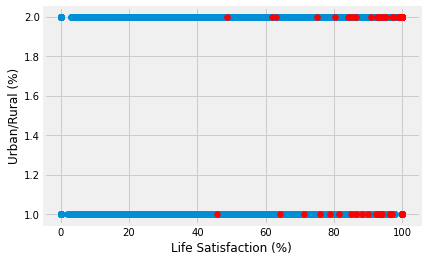

In [146]:
plt.scatter(by_country_psu['Life Satisfaction (%)'], by_country_psu['Urban/Rural']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Urban/Rural'], c = 'red')
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Urban/Rural (%)');

In [147]:
real_satisfaction_urban = np.mean(by_country_psu[by_country_psu['Urban/Rural'] == 1]['Life Satisfaction (%)'])
real_satisfaction_urban

48.00053421666664

In [148]:
real_satisfaction_rural = np.mean(by_country_psu[by_country_psu['Urban/Rural'] == 2]['Life Satisfaction (%)'])
real_satisfaction_rural

53.433601491120214

In [149]:
real_satisfaction_urban_rural_diff = real_satisfaction_rural - real_satisfaction_urban
real_satisfaction_urban_rural_diff

5.4330672744535775

In [150]:
satisfaction_urban_rural_for_permutation = by_country_psu.copy()
satisfaction_urban_rural_for_permutation['Life Satisfaction (%)'] = np.random.permutation(satisfaction_urban_rural_for_permutation['Life Satisfaction (%)'])
fake_satisfaction_urban = np.mean(satisfaction_urban_rural_for_permutation[satisfaction_urban_rural_for_permutation['Urban/Rural'] == 1]['Life Satisfaction (%)'])
fake_satisfaction_urban

50.48165429348005

In [151]:
fake_satisfaction_rural = np.mean(satisfaction_urban_rural_for_permutation[satisfaction_urban_rural_for_permutation['Urban/Rural'] == 2]['Life Satisfaction (%)'])
fake_satisfaction_rural

50.135278095319535

In [152]:
fake_satisfaction_urban_rural_diff = fake_satisfaction_rural - fake_satisfaction_urban
fake_satisfaction_urban_rural_diff

-0.3463761981605131

In [153]:
# Run a permutation test
n_trials = 5000
fake_satisfaction_urban_rural_diffs = np.zeros(n_trials)
for i in np.arange(n_trials):
    satisfaction_urban_rural_for_permutation['Life Satisfaction (%)'] = np.random.permutation(satisfaction_urban_rural_for_permutation['Life Satisfaction (%)'])
    fake_satisfaction_urban = np.mean(satisfaction_urban_rural_for_permutation[satisfaction_urban_rural_for_permutation['Urban/Rural'] == 1]['Life Satisfaction (%)'])
    fake_satisfaction_rural = np.mean(satisfaction_urban_rural_for_permutation[satisfaction_urban_rural_for_permutation['Urban/Rural'] == 2]['Life Satisfaction (%)'])
    fake_satisfaction_urban_rural_diffs[i] = fake_satisfaction_rural - fake_satisfaction_urban
fake_satisfaction_urban_rural_diffs[:5]

array([-0.00548355, -0.51761377,  0.58080901, -0.87096006,  1.57273902])

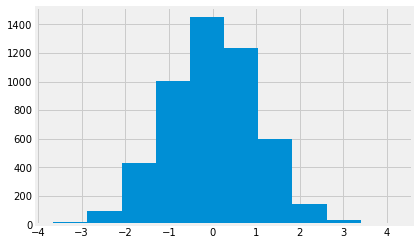

In [154]:
# Plot a histogram
plt.hist(fake_satisfaction_urban_rural_diffs);

In [155]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_satisfaction_urban_rural = np.count_nonzero(fake_satisfaction_urban_rural_diffs >= real_satisfaction_urban_rural_diff) / len(fake_satisfaction_urban_rural_diffs)
p_gte_satisfaction_urban_rural

0.0

Having explored the correlations between several variables and life satisfaction, we see that some are better predictors than others. We next use multiple linear regression to see if we can do better by considering multiple variables at the same time for predicting life satisfaction.

In [186]:
# Create a copy of the by_country dataframe but drop all rows that have NaN values (which could have come about if, for example, all respondents in a PSU refused to answer a certain question).
by_country_no_nan = by_country.copy().dropna()
N_by_country = len(by_country_no_nan)
half_N_by_country = int(N_by_country / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_by_country = by_country_no_nan.sample(n=N_by_country, replace=False)
train_by_country = shuffled_by_country.iloc[:half_N_by_country]
test_by_country = shuffled_by_country.iloc[half_N_by_country:]
print(len(train_by_country), 'training and', len(test_by_country), 'test instances.')

16 training and 17 test instances.


In [187]:
columns_to_drop_by_country = ['Country', 'Life Satisfaction (%)', 'Mean Latitude']

In [188]:
example_row_by_country = test_by_country.drop(columns = columns_to_drop_by_country).iloc[0]
example_slopes_by_country = np.random.normal(1, 1, len(example_row_by_country))
train_satisfaction = train_by_country['Life Satisfaction (%)']
train_attributes = train_by_country.drop(columns = columns_to_drop_by_country)

In [189]:
print('RMSE of all training examples using random slopes:', rmse_train(example_slopes_by_country))

RMSE of all training examples using random slopes: 425.0666796633406


In [190]:
# Use minimize to calculate smallest RMSE slopes.
multi_res_by_country = minimize(rmse_train_fast, example_slopes_by_country)
best_slopes_by_country = multi_res_by_country.x
best_slopes_by_country

array([-0.37539206, -0.18824477,  0.66787134,  0.1662093 ,  0.77006602])

In [191]:
test_satisfaction = test_by_country['Life Satisfaction (%)']
test_attributes = test_by_country.drop(columns = columns_to_drop_by_country)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_satisfaction)

rmse_linear_by_country = rmse_test(best_slopes_by_country)
print('Test set RMSE for multiple linear regression:', rmse_linear_by_country)

Test set RMSE for multiple linear regression: 12.398684383151288


0.7399332373812623

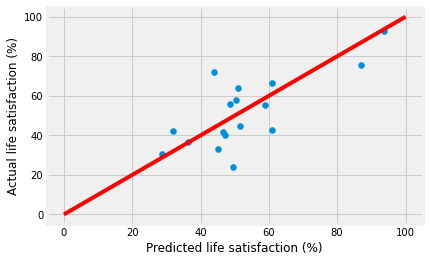

In [192]:
def fit(row):
    return sum(best_slopes_by_country * np.array(row))

fitted = test_attributes.apply(fit, axis=1)
plt.scatter(fitted, test_satisfaction);
# Plot x=y line.
plt.plot([0, 100], [0, 100], color='red');
plt.xlabel('Predicted life satisfaction (%)');
plt.ylabel('Actual life satisfaction (%)');
correlation(fitted, test_satisfaction)

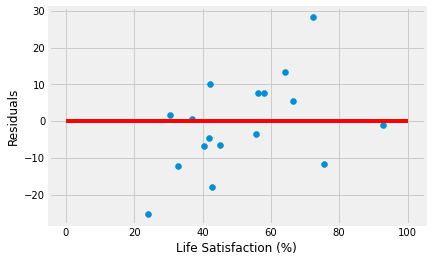

In [193]:
# Plot the residuals
plt.scatter(test_satisfaction, test_satisfaction - fitted);
plt.plot([0, 100], [0, 0], color='red');
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Residuals');

In [160]:
# Create a copy of the by_country_psu dataframe but drop all rows that have NaN values (which could have come about if, for example, all respondents in a PSU refused to answer a certain question).
by_country_psu_no_nan = by_country_psu.copy().dropna()
N = len(by_country_psu_no_nan)
half_N = int(N / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_by_country_psu = by_country_psu_no_nan.sample(n=N, replace=False)
train = shuffled_by_country_psu.iloc[:half_N]
test = shuffled_by_country_psu.iloc[half_N:]
print(len(train), 'training and', len(test), 'test instances.')

1265 training and 1266 test instances.


In [161]:
columns_to_drop = ['Country', 'PSU', 'Count', 'Life Satisfaction (%)', 'Authoritarianism (%)', 'Mean age', 'Socialising (%)', 'Monthly Income (LCU)', 'PPP', 'Wealth Level', 'Past Wealth Level', 'Predicted Wealth Level', 'Education level', 'Employment (%)', 'Latitude', 'Religious (%)', 'Urban/Rural']

In [162]:
def predict(slopes, row):
    return np.sum(slopes * np.array(row))

example_row = test.drop(columns = columns_to_drop).iloc[0]
example_slopes = np.random.normal(1, 1, len(example_row))
train_satisfaction = train['Life Satisfaction (%)']
train_attributes = train.drop(columns = columns_to_drop)

In [163]:
def rmse(slopes, attributes, y_values):
    errors = []
    for i in np.arange(len(y_values)):
        predicted = predict(slopes, attributes.iloc[i])
        actual = y_values.iloc[i]
        errors.append((actual - predicted) ** 2)
    return np.sqrt(np.mean(errors))

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_satisfaction)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 4969.56308308028


In [164]:
def rmse_fast(slopes, attributes, y_values):
    # Make an n by s array of slopes by copying the s slopes array n times.
    slopes_array = np.tile(slopes, [len(y_values), 1])
    # Multiply the n by s array by the corresponding attributes.
    predicted = np.sum(slopes_array * attributes, axis=1)
    errors = y_values - predicted
    return np.sqrt(np.mean(errors ** 2))

def rmse_train_fast(slopes):
    return rmse_fast(slopes, train_attributes, train_satisfaction)

In [165]:
from scipy.optimize import minimize

In [166]:
# Use minimize to calculate smallest RMSE slopes.
multi_res = minimize(rmse_train_fast, example_slopes)
best_slopes = multi_res.x
best_slopes

array([3.50613593e-03, 7.64083114e+00, 4.55638644e+00, 5.22396997e-01,
       1.31180819e-01, 1.26170901e-01, 1.13288164e-01])

In [167]:
test_satisfaction = test['Life Satisfaction (%)']
test_attributes = test.drop(columns = columns_to_drop)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_satisfaction)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 19.02489521696232


0.670108334421492

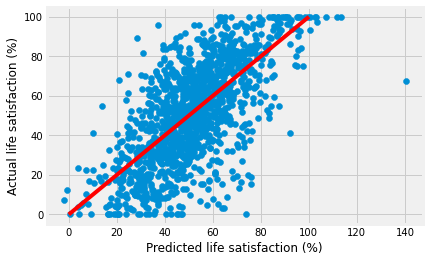

In [168]:
def fit(row):
    return sum(best_slopes * np.array(row))

fitted = test_attributes.apply(fit, axis=1)
plt.scatter(fitted, test_satisfaction);
# Plot x=y line.
plt.plot([0, 100], [0, 100], color='red');
plt.xlabel('Predicted life satisfaction (%)');
plt.ylabel('Actual life satisfaction (%)');
correlation(fitted, test_satisfaction)

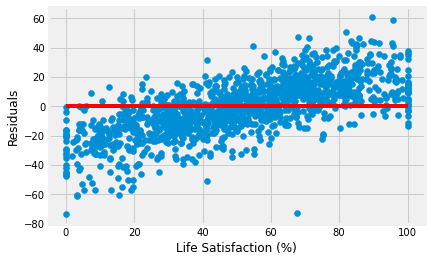

In [169]:
# Plot the residuals
plt.scatter(test_satisfaction, test_satisfaction - fitted);
plt.plot([0, 100], [0, 0], color='red');
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Residuals');

In [170]:
# Create a copy of the by_country_psu dataframe but drop all rows that have NaN values (which could have come about if, for example, all respondents in a PSU refused to answer a certain question).
by_country_psu_uzbekistan_no_nan = by_country_psu[by_country_psu['Country'] == 'Uzbekistan'].copy().dropna()
N = len(by_country_psu_uzbekistan_no_nan)
half_N = int(N / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_by_country_psu = by_country_psu_uzbekistan_no_nan.sample(n=N, replace=False)
train = shuffled_by_country_psu.iloc[:half_N]
test = shuffled_by_country_psu.iloc[half_N:]
print(len(train), 'training and', len(test), 'test instances.')

37 training and 38 test instances.


In [171]:
columns_to_drop = ['Country', 'PSU', 'Count', 'Life Satisfaction (%)', 'Authoritarianism (%)', 'Mean age', 'Socialising (%)', 'Monthly Income (LCU)', 'PPP', 'Monthly Income ($)', 'Wealth Level', 'Past Wealth Level', 'Good health (%)', 'Education level', 'Latitude', 'Religious (%)', 'Generally Trusting (%)', 'Urban/Rural']

In [172]:
def predict(slopes, row):
    return np.sum(slopes * np.array(row))

example_row = test.drop(columns = columns_to_drop).iloc[0]
example_slopes = np.random.normal(1, 1, len(example_row))
train_satisfaction = train['Life Satisfaction (%)']
train_attributes = train.drop(columns = columns_to_drop)

In [173]:
def rmse(slopes, attributes, y_values):
    errors = []
    for i in np.arange(len(y_values)):
        predicted = predict(slopes, attributes.iloc[i])
        actual = y_values.iloc[i]
        errors.append((actual - predicted) ** 2)
    return np.sqrt(np.mean(errors))

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_satisfaction)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 246.1905357483197


In [174]:
def rmse_fast(slopes, attributes, y_values):
    # Make an n by s array of slopes by copying the s slopes array n times.
    slopes_array = np.tile(slopes, [len(y_values), 1])
    # Multiply the n by s array by the corresponding attributes.
    predicted = np.sum(slopes_array * attributes, axis=1)
    errors = y_values - predicted
    return np.sqrt(np.mean(errors ** 2))

def rmse_train_fast(slopes):
    return rmse_fast(slopes, train_attributes, train_satisfaction)

In [175]:
from scipy.optimize import minimize

In [176]:
# Use minimize to calculate smallest RMSE slopes.
multi_res = minimize(rmse_train_fast, example_slopes)
best_slopes = multi_res.x
best_slopes

array([-1.08120412,  2.28200421,  0.01636568,  0.32476306,  0.01555521,
        0.53845247])

In [177]:
test_satisfaction = test['Life Satisfaction (%)']
test_attributes = test.drop(columns = columns_to_drop)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_satisfaction)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 11.719186484409777


0.5975360415534265

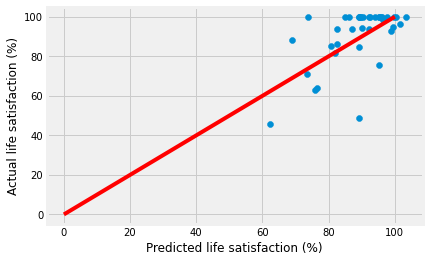

In [178]:
def fit(row):
    return sum(best_slopes * np.array(row))

fitted = test_attributes.apply(fit, axis=1)
plt.scatter(fitted, test_satisfaction);
# Plot x=y line.
plt.plot([0, 100], [0, 100], color='red');
plt.xlabel('Predicted life satisfaction (%)');
plt.ylabel('Actual life satisfaction (%)');
correlation(fitted, test_satisfaction)

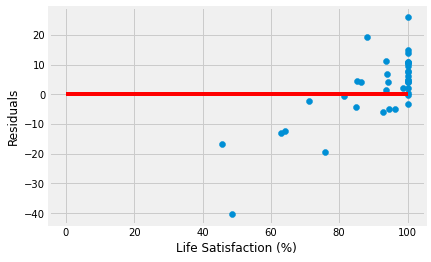

In [179]:
# Plot the residuals
plt.scatter(test_satisfaction, test_satisfaction - fitted);
plt.plot([0, 100], [0, 0], color='red');
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Residuals');

In [180]:
import useful_fun as uf

In [181]:
for_satisfaction_by_socialising = exclude_values(lits_2016, 'Life Satisfaction', satisfaction_exclusions)
mean_satisfaction_by_socialising = [np.mean(for_satisfaction_by_socialising[for_satisfaction_by_socialising['Socialising'] == socialising]['Life Satisfaction']) for socialising in range(1,6,1)]

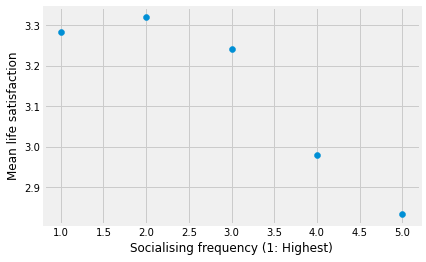

In [182]:
plt.scatter(range(1,6,1), mean_satisfaction_by_socialising)
plt.xlabel('Socialising frequency (1: Highest)');
plt.ylabel('Mean life satisfaction');

In [183]:
correlation(range(1,6,1), mean_satisfaction_by_socialising)

-0.91793166028455

In [184]:
for_satisfaction_by_wealth_level = exclude_values(lits_2016, 'Life Satisfaction', satisfaction_exclusions)
mean_satisfaction_by_wealth_level = [np.mean(for_satisfaction_by_wealth_level[for_satisfaction_by_wealth_level['Wealth Level'] == wealth_level]['Life Satisfaction']) for wealth_level in range(1,11,1)]

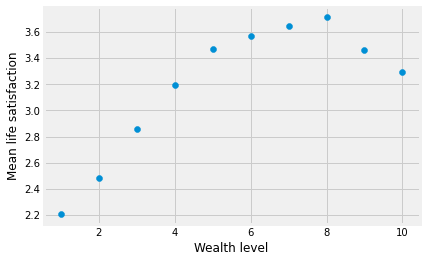

In [185]:
plt.scatter(range(1,11,1), mean_satisfaction_by_wealth_level)
plt.xlabel('Wealth level');
plt.ylabel('Mean life satisfaction');